In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,gradient_boosting
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [6]:
df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


After watching the dataset we get that the column "Unnamed: 0" is nothing both the simple id which is of no use so we will drop that column and it will not affect the dataset as well.

In [7]:
df.drop("Unnamed: 0",inplace=True,axis=1)

In [8]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Now we will check the total rows and columns of the dataset.

In [9]:
df.shape

(18249, 13)

In [10]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [11]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

As we can see from the above that our data contains 18249 rows and 13 columns after dropping the extra index column.
Also we have checked the data types of the columns and found that most of the columns are of same data type i.e float and date,type and region are in object data type.

Now further we will check the null values in the dataset using heatmap.

<AxesSubplot:>

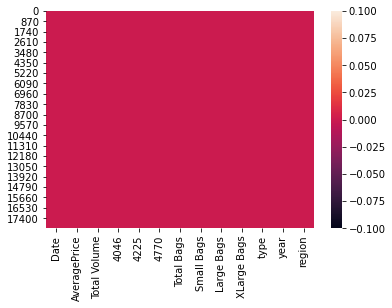

In [12]:
sns.heatmap(df.isnull())

From this heat map we can clearly see that there is no ull values in our data as the red colour is evenly distribute.

Now we will check the mean of price at ecah year of organic type of avocado.

In [13]:
df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

Now we will find how much type of avocado is sell in last 4 years.

In [14]:
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

From above we can see that the year 2017 have the highest price and 2015 has the second highest number.

In [15]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Above statistics shows that there can be outliers present in data and there is difference between mean and 50% value in some of the column which is used to get fix for better prediction.

The numbers of rows in each column  are same that means there are no null values in the dataset.

The mean and 50% value is mot=st of the column are same and the std mean are very close to each other.
Most of the column data are near to 0.
By checking difference between th 75% and the max value it is seen that there are outliers in some of the column.

Now we will visualize the data.

Firstly we will check the ratio of year and price that which year had max average price.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

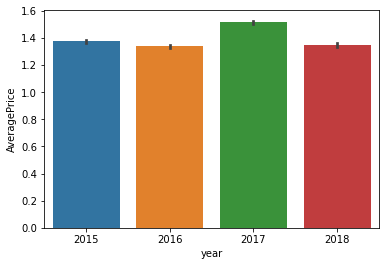

In [16]:
sns.barplot(x = "year" , y = "AveragePrice", data = df)

Above graph shows that 2017 is the year where max price is seen. 

Now we will check the ratio of month and price that which year had max average price.

Now we will check the skewness of the data using histogram.

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

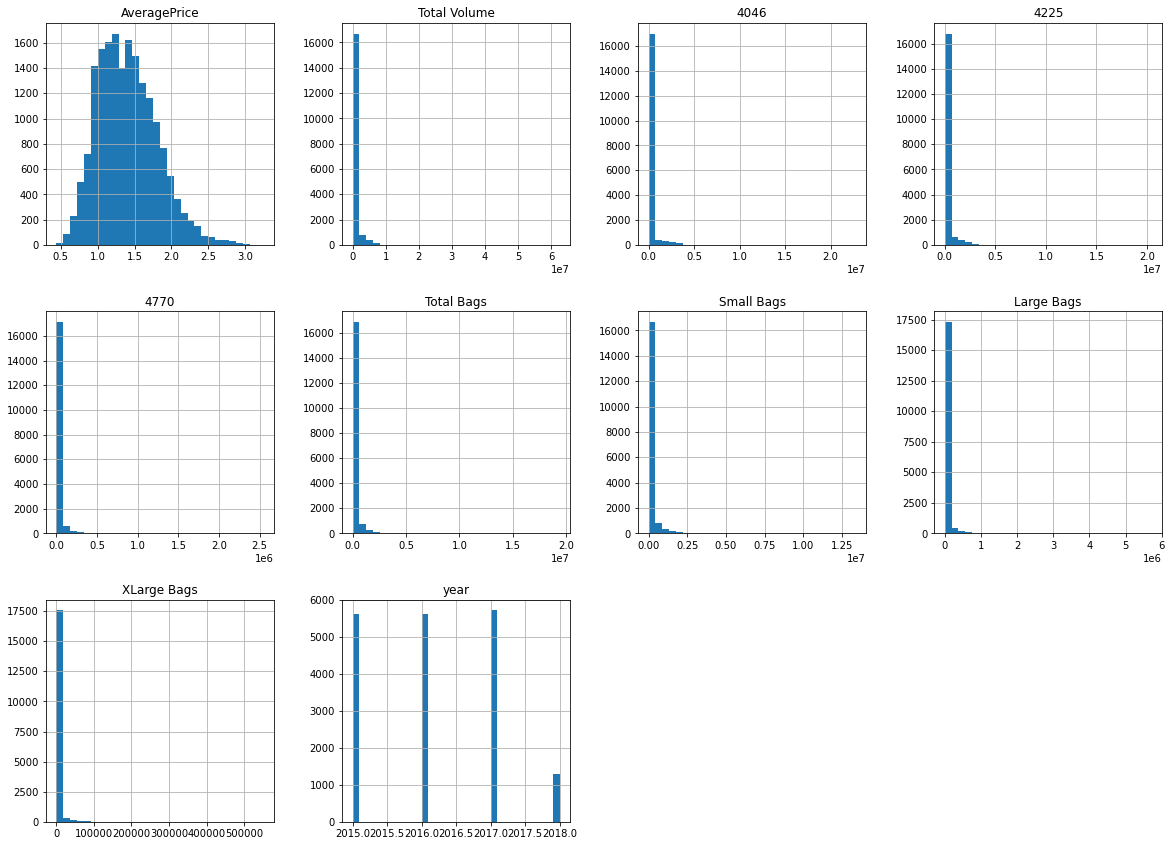

In [17]:
df.hist(figsize = (20,20) , grid = True, layout = (4,4), bins = 30)

From above it is seen that the AveragePrice column is normally distributed and rest of the data does not much varies in terms of number so it is left skewed data.

In [18]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

Now we will make the skew less than or equal to 0.55 for better prediction and plottim=ng Normal Distribution.

In [19]:
skew = ("Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags")
for col in skew :
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

Now we will check the outliers for each column.

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
year            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
dtype: object

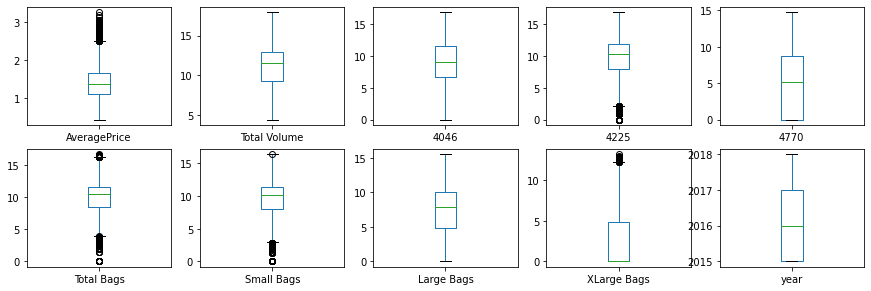

In [20]:
df.plot(kind = "box", subplots =  True, layout = (4,5), figsize = (15,10))

As we can see from above ome columns contains outliers so we will try to remove it now.

Firstly we will covert region and type to numerical values using LabelEncoder.

In [21]:
cols = ["type", "region"]
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [22]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0
1,2015-12-20,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0
2,2015-12-13,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0
3,2015-12-06,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0
4,2015-11-29,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0


In [23]:
df.shape

(18249, 13)

Now we will check the correlation of all column to each other.

[]

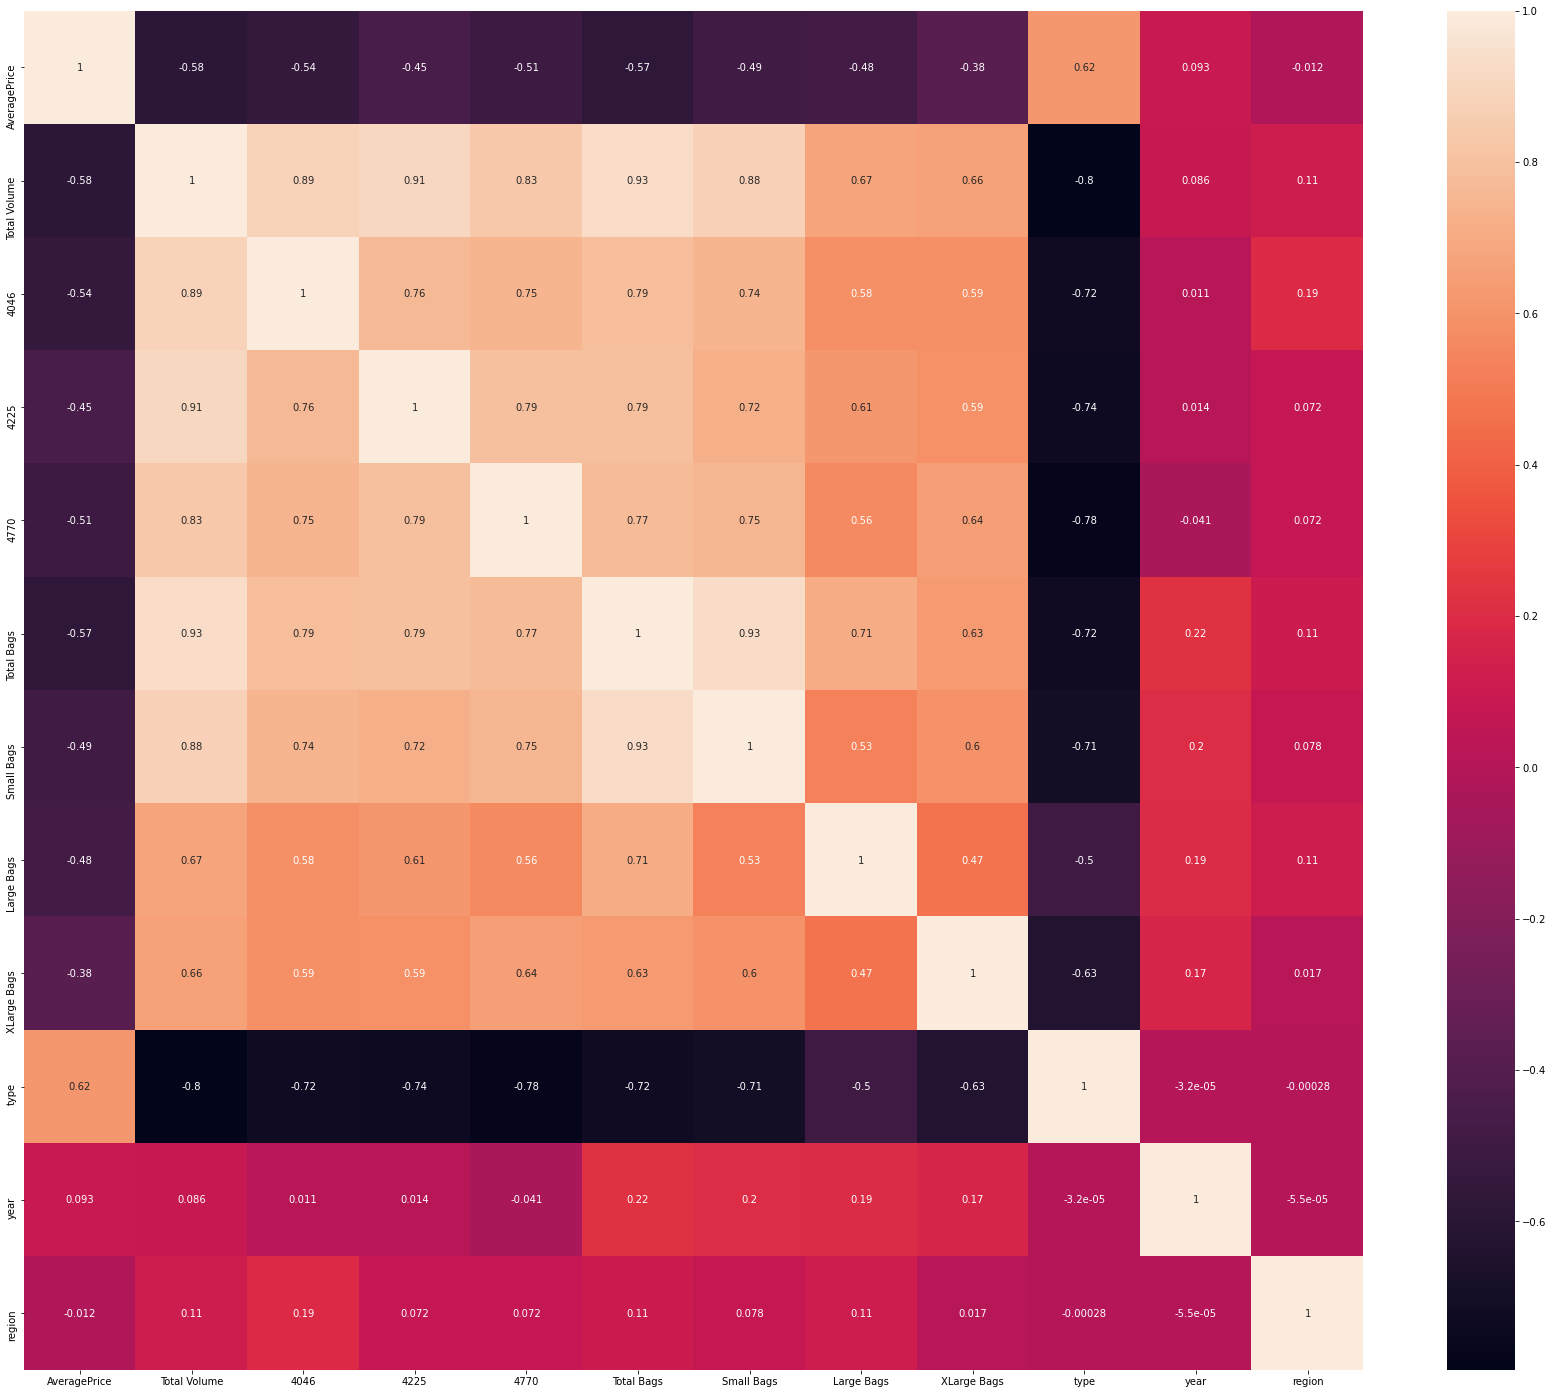

In [24]:
df_cor = df.corr()
plt.figure(figsize = (30,25))
sns.heatmap(df_cor,annot = True)
plt.plot()

In [25]:
X = df.drop(['AveragePrice','Date'], axis=1)
Y = df["AveragePrice"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=50, test_size=0.2)

Above we had spilt the data into x ad y variable and we are using standard scaling method on x variable.

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

 Now by using multiple algorithms we are calculating the best algorithm which suits best for our dataset.

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = [DecisionTreeRegressor(), KNeighborsRegressor(), LinearRegression(), AdaBoostRegressor(), GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(40,90):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=r_state, test_size=0.33)
    for i in model:
        i.fit(X_train,Y_train)
        pre = i.predict(X_test)
        r2_sc = r2_score(Y_test,pre)
        print("R2 score correspond to random state", r_state, "is",r2_sc)
        if r2_sc > max_r2_score:
            max_r2_score = r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print() 
print()
print("max R2 score correspond to random state ",final_state, "is", max_r2_score, "and model is", final_model)

R2 score correspond to random state 40 is 0.6626142481319557
R2 score correspond to random state 40 is 0.8111440983023015
R2 score correspond to random state 40 is 0.5101284520637176
R2 score correspond to random state 40 is 0.4721052852003692
R2 score correspond to random state 40 is 0.668479461755801
R2 score correspond to random state 41 is 0.6615164013384807
R2 score correspond to random state 41 is 0.8166424232785432
R2 score correspond to random state 41 is 0.5227706240016441
R2 score correspond to random state 41 is 0.4867799717207497
R2 score correspond to random state 41 is 0.6858896224032223
R2 score correspond to random state 42 is 0.677128101722118
R2 score correspond to random state 42 is 0.8244853372696468
R2 score correspond to random state 42 is 0.5077795952573679
R2 score correspond to random state 42 is 0.44508547700463397
R2 score correspond to random state 42 is 0.6726899116262466
R2 score correspond to random state 43 is 0.6677007850141323
R2 score correspond to ra

Now checking best parameter for prediction of KNeighborsRegressor algorithm using GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=77, test_size=0.33)
KN = KNeighborsRegressor()
parameters = {'n_neighbors' : range(1,30)}
gridsearch = GridSearchCV(KN,parameters)
gridsearch.fit(X_train,Y_train)
gridsearch.best_params_

{'n_neighbors': 3}

In [30]:
KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train,Y_train)
pred = KNN.predict(X_test)
r2_sc = r2_score(Y_test,pred)
print("R2 Score : ",r2_sc*100)

R2 Score :  83.78645022019589


In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean Absolute Error : ",mean_absolute_error(Y_test,pred))
print("Mean Squared Error : ",mean_squared_error(Y_test,pred))
print("Root Mean Absolute Error : ",np.sqrt(mean_absolute_error(Y_test,pred)))

Mean Absolute Error :  0.1142265759034811
Mean Squared Error :  0.026525747597173795
Root Mean Absolute Error :  0.33797422372642727


Now we will check the difference between predicted and actual value using graph.

Text(0, 0.5, 'Predicted_Y')

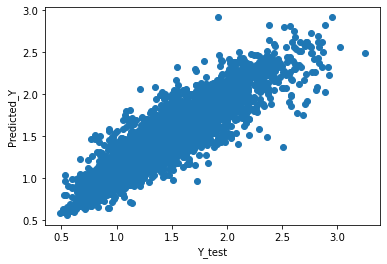

In [32]:
plt.scatter(x=Y_test,y=pred)
plt.xlabel('Y_test')
plt.ylabel('Predicted_Y')

Above we have done the prediction using average price as the output variable so we used regression technique as the data is in continuity.
While calculating the best random state the 77 is the best state which is providing us the highest R2 score value for this model.
After using GridSearchCV, we find the best params and we used that params for model amd found that the best model is KNNeighboursRegressor.
We found the matrices that provides the best score.
We plot the scatter plot as well to see the actual value and predicted values are very close to each other.

Now we will predict the value using region as output variable.
Here we will use the classification models as the data is categorical in nature.

In [33]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [35]:
#assign the values of x and y for training and testing phase
x_c = df.drop(columns = ['region','Date'])
y_c = df[["region"]]
print(x_c.shape)
print(y_c.shape)

(18249, 11)
(18249, 1)


In [36]:
#Standardizing the value of x as to ake the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x_c)
x_c = pd.DataFrame(x_c , columns = x_c.columns)

Now we are taking region as output variableand try to prediction using classification method.

In [39]:
model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    xc_train,xc_test,yc_train,yc_test = train_test_split(x_c,y_c,random_state = r_state,test_size = 0.33)
    for i_c in model:
        i_c.fit(xc_train,yc_train)
        pre_c = i_c.predict(xc_test)
        ac_score = accuracy_score(yc_test,pre_c)
        print("accuracy_score correspond to random state" ,r_state,"is",ac_score)
        if ac_score > max_accuracy_score:
            max_accuracy_score = ac_score
            final_state = r_state
            final_model = i_c
            
print()
print()
print()
print()
print("max accuracy score correspond to random state ",final_state , "is" , max_accuracy_score, "and model is",final_model)

accuracy_score correspond to random state 40 is 0.7869832309480326
accuracy_score correspond to random state 40 is 0.8440976257678897
accuracy_score correspond to random state 41 is 0.7793458409430516
accuracy_score correspond to random state 41 is 0.8379545077204051
accuracy_score correspond to random state 42 is 0.78797941225303
accuracy_score correspond to random state 42 is 0.841607172505396
accuracy_score correspond to random state 43 is 0.7811721733355471
accuracy_score correspond to random state 43 is 0.8369583264154076
accuracy_score correspond to random state 44 is 0.782002324423045
accuracy_score correspond to random state 44 is 0.8429354142453926
accuracy_score correspond to random state 45 is 0.7921301676905197
accuracy_score correspond to random state 45 is 0.8434335048978914
accuracy_score correspond to random state 46 is 0.7836626265980409
accuracy_score correspond to random state 46 is 0.8462560185953844
accuracy_score correspond to random state 47 is 0.790801925950523


As we get the best model and accuracy score now we will find the best params.

In [40]:
#checking the best parameters for predictions of the best model
from sklearn.model_selection import GridSearchCV
xc_train,xc_test,yc_train,yc_test = train_test_split(x_c,y_c,random_state = 53, test_size = 0.33)
KNC = KNeighborsClassifier()
parameters = {'n_neighbors': range(1,30)}
gridsearch = GridSearchCV(KNC,parameters)
gridsearch.fit(xc_train,yc_train)
gridsearch.best_params_

{'n_neighbors': 1}

In [41]:
KNC = KNeighborsClassifier(n_neighbors = 1)
KNC.fit(xc_train,yc_train)
predc = KNC.predict(xc_test)
acu_score = accuracy_score(yc_test,predc)
print("Accuracy Score : ",acu_score*100)

Accuracy Score :  87.09945210028225


In [42]:
#calculating the scores of different parameters
score = cross_val_score(KNC,x_c,y_c,cv = 100,scoring='accuracy').mean()
print("Cross_val_score : ",score*100)
print("Mean Score : ",score.mean()*100)
print("STD score : ",score.std())

Cross_val_score :  85.47967333213236
Mean Score :  85.47967333213236
STD score :  0.0


Above we found that our best classification model is KNeighborsClassifier and the best random state is 53 which is giving the best accuracy score of 85%.
Also by using the gridsearchcv we findthe best params and the best accuracy score of 87%.

Now we will plot the roc curve.

In [43]:
pred_prob = KNC.predict_proba(xc_test)[:,1]
pred_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [44]:
fpr,tpr,thresholds = roc_curve(yc_test,pred_prob,pos_label = True)

In [45]:
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)

[0.        0.0055715 1.       ]


[0.   0.84 1.  ]


[2. 1. 0.]


Now as we find the values we will plota graph that will show us about the area under curve(auc), i.e more area under curve more will be the better prediction.

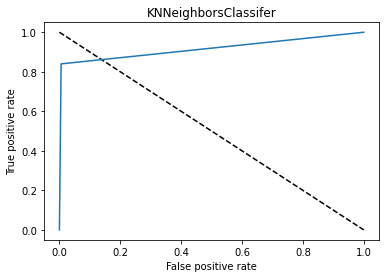

In [47]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = "KNNeighborsClassifier")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("KNNeighborsClassifer")
plt.show()

From the above all we have observed that region as a output variable is predicting well for this model as compare to average price.
Also Accuracy Score is greater than R2 score.
There are no much outliers in the dataset after replacing with mean value.
As organic type of avocado is having more price per unit then conventional.
So we have done prediction using region and price but the prediction score for region is high as compared to average price.

Now we will save the model:-

In [48]:
import joblib
joblib.dump(predc,"AvocadoPrice")

['AvocadoPrice']